In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Read data

In [7]:
# TV: Advertising dollar spent on TV (in thousands of dollars)
# Radio: Advertising dollar spent on Radio (in thousands of dollars)
# Newspaper: Advertising dollar spent on Newspaper (in thousands of dollars)
# Sales: Sales of a single product (in thousands of widgets)

data = pd.read_csv("Advertising.csv", index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [11]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Distribution of Features

C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\6370269521\Anaconda3\li

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

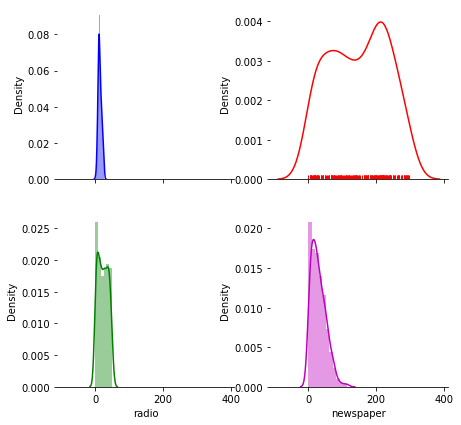

In [10]:
f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.despine(left=True)
sns.distplot(data.sales, color="b", ax=axes[0,0])
sns.distplot(data.TV, hist=False, rug=True, color="r", ax=axes[0,1])
sns.distplot(data.radio, color="g", ax=axes[1,0])
sns.distplot(data.newspaper, color="m", ax=axes[1,1])

# Relationship between sales and spend various advertising channels

C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


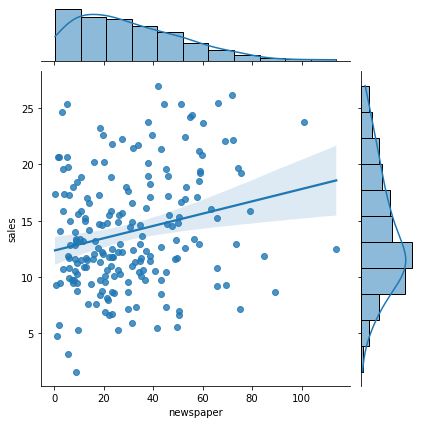

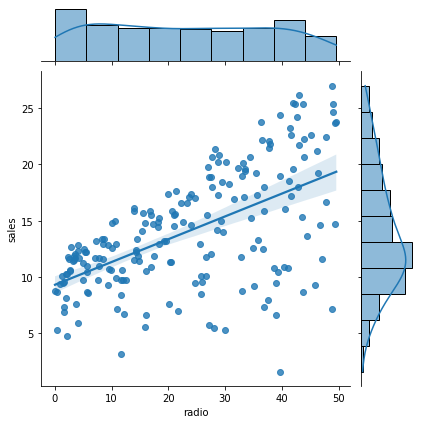

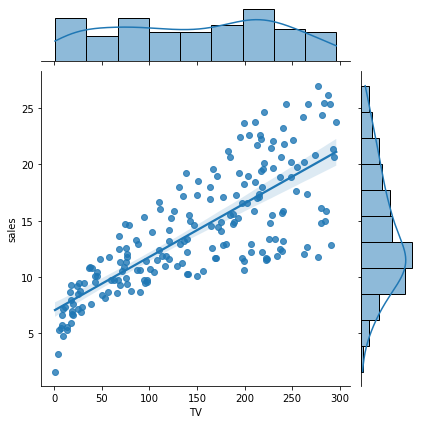

In [21]:
sns.jointplot("newspaper", "sales", data=data, kind='reg')
sns.jointplot("radio", "sales", data=data, kind='reg')
sns.jointplot("TV", "sales", data=data, kind='reg')

# Visualising Pairwise correlation

C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


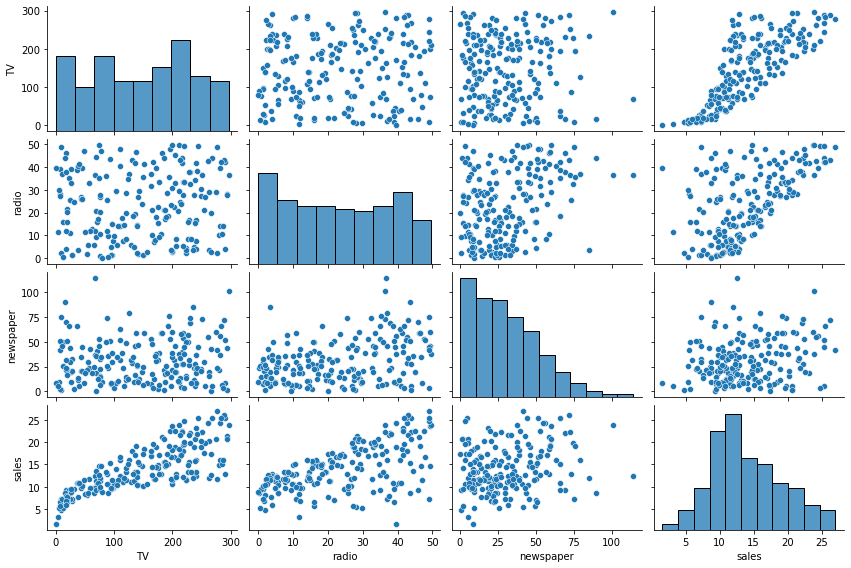

In [16]:
sns.pairplot(data, size=2, aspect=1.5)

C:\Users\6370269521\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


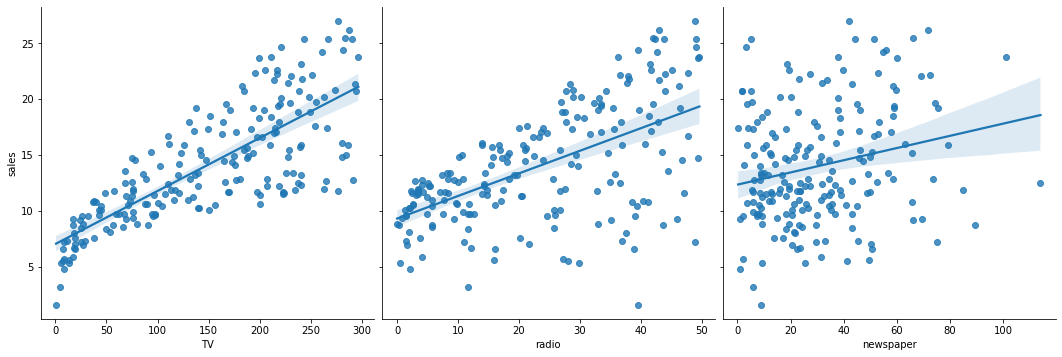

In [17]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

### Observation
    - Strong relationship between TV ads and sales
    - Weak rela tionship beteen Radio ads and sales
    - Very weak to no relationship between Newspaper ads and sales

# Calculating and plotting heatmap correlation

In [18]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

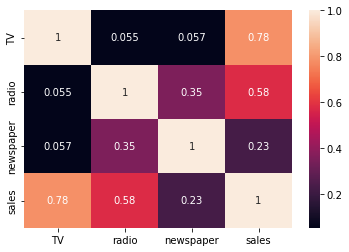

In [19]:
sns.heatmap(data.corr(), annot=True)